# Expt 8

## Aim: Implement Tipping problem using Fuzzy Logic

In [6]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 8.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d6d686ad4845bc89fdfc8bf808db46d0e4a7ee0e941a1bf30c4101e4ee7ab2f0
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [41]:
# Antecedants
quality = ctrl.Antecedent(np.arange(0, 11), 'quality')
service = ctrl.Antecedent(np.arange(0, 11), 'service')

# Auto mf
quality.automf(3)
service.automf(3)


# Consequent
tip = ctrl.Consequent(np.arange(0, 26), 'tip')

# membership function
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

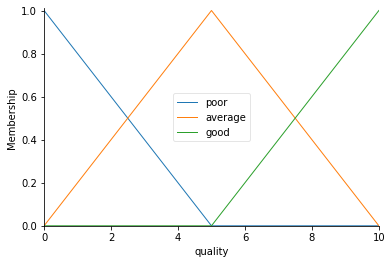

In [42]:
quality.view()

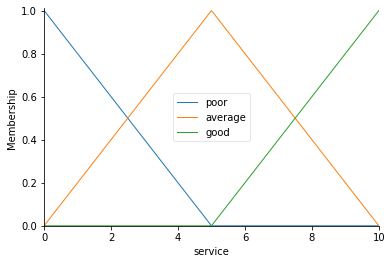

In [43]:
service.view()

In [44]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] | service['good'], tip['high'])

In [45]:
tipping_ctrl = ctrl.ControlSystem({rule1, rule2, rule3})

In [46]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [47]:
# Test values
tipping.input['quality'] = 9.9
tipping.input['service'] = 5.5

tipping.compute()


14.678889192459314


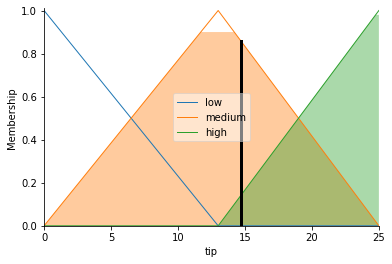

In [48]:
print(tipping.output['tip'])
tip.view(sim = tipping)

## Conclusion: Tipping problem was successfully studied and implemented.